In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
customer= pd.read_csv(r'C:\Users\Dell\Downloads\customers_dataset.csv')
order_items= pd.read_csv(r'C:\Users\Dell\Downloads\order_items_dataset.csv')
order_payments= pd.read_csv(r'C:\Users\Dell\Downloads\order_payments_dataset.csv')
order_reviewer= pd.read_csv(r'C:\Users\Dell\Downloads\order_reviews_dataset.csv')
order= pd.read_csv(r'C:\Users\Dell\Downloads\orders_dataset.csv')
product_category= (r'C:\Users\Dell\Downloads\product_category_name_translation.csv')
products= pd.read_csv(r'C:\Users\Dell\Downloads\products_dataset.csv')

KẾT HỢP CÁC BẢNG LẠI VỚI NHAU

In [3]:
df= order.merge(order_items, on=['order_id'], how='left')
df= df.merge(order_payments, on=['order_id'], how= 'left')
df= df.merge(products, on=['product_id'], how= 'left')
df= df.merge(order_reviewer, on=['order_id'], how='left')
df= df.merge(customer, on=['customer_id'], how='left')

In [4]:
df['month']= pd.to_datetime(df['order_delivered_customer_date']).dt.month
df['year']= pd.to_datetime(df['order_delivered_customer_date']).dt.year

In [46]:
#quy đổi dữ liệu
df["month"]=df["month"].replace((1,2,3,4,5,6,7,8,9,10,11,12),('January','February' ,'March' ,'April' ,'May' ,'June' ,'July' ,'August' ,'September','October' ,'November' ,'December' ))

TÌNH HÌNH KINH DOANH CỦA CÔNG TY THEO THÁNG VÀ NĂM

In [4]:
turnover= pd.pivot_table(df,index='month', columns='year', values='payment_value', aggfunc=np.sum, fill_value=0).reset_index(drop= False)
turnover

year,month,2016.0,2017.0,2018.0
0,1.0,0.00,48998.24,1240964.71
1,2.0,0.00,292718.66,1096597.61
2,3.0,0.00,479845.49,1444359.04
3,4.0,0.00,369535.26,1644196.13
4,5.0,0.00,729657.52,1531657.11
5,6.0,0.00,621972.36,1518790.24
6,7.0,0.00,654493.29,1197100.67
7,8.0,0.00,798605.92,1675763.13
8,9.0,0.00,886990.40,13186.10
9,10.0,46599.54,1121077.48,347.95


In [7]:
#doanh thu theo năm
turnover_year= df.groupby('year')['payment_value'].sum().reset_index()
xs,ys= turnover_year['year'], turnover_year['payment_value']

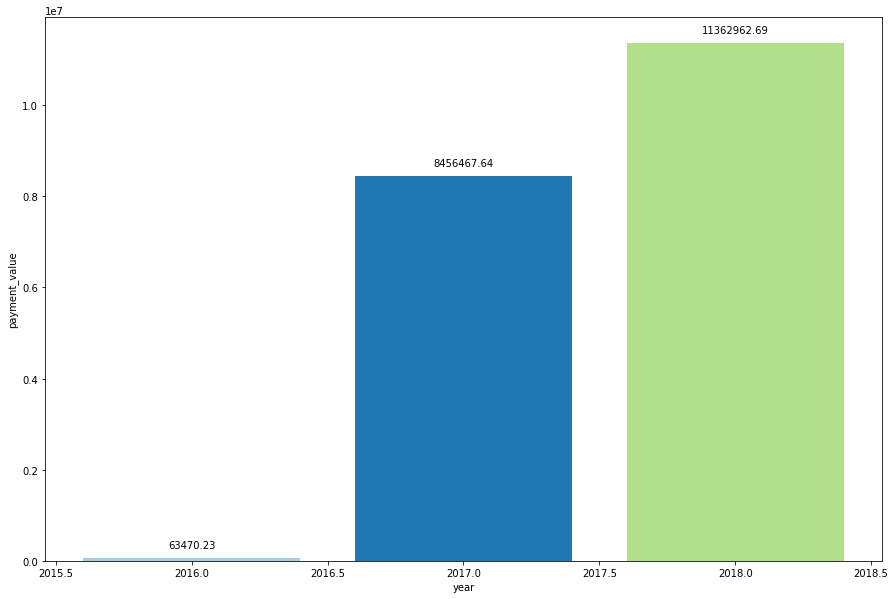

In [8]:
plt.figure(figsize=(15,10))
plt.bar(xs,ys, color= sns.color_palette('Paired'));
plt.xlabel('year')
plt.ylabel('payment_value')
for x,y in zip(xs,ys):
    
        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                    (x,y), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(0,10), # distance from text to points (x,y)
                    ha='center') # horizontal alignment can be left, right or center

plt.show()

    

In [9]:
#doanh thu theo từng tháng
turnover_month= df.groupby('month')['payment_value'].sum().reset_index()
x,y= turnover_month['month'], turnover_month['payment_value']


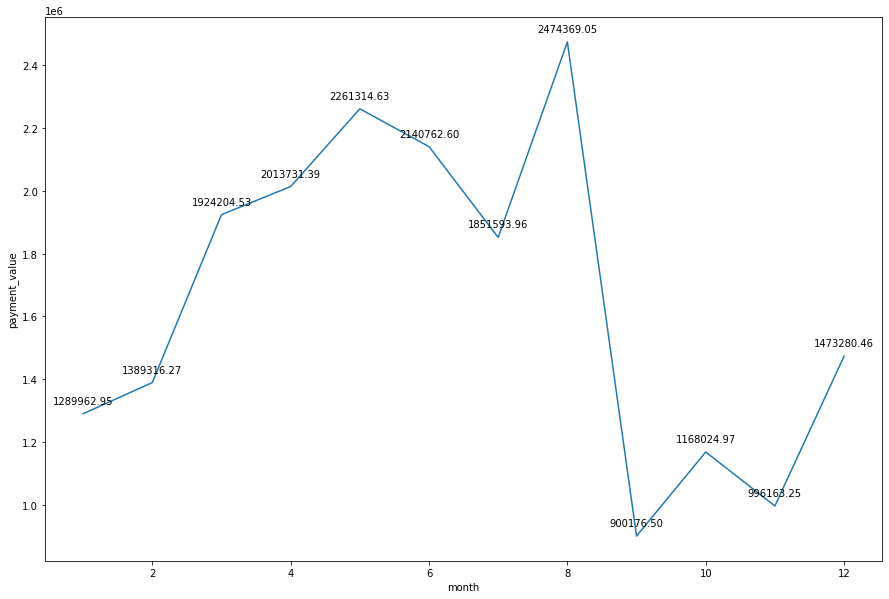

In [15]:
plt.figure(figsize=(15,10))
plt.plot(x,y)
plt.xlabel('month')
plt.ylabel('payment_value')
for a,b in zip(x,y):
    
        label = "{:.2f}".format(b)

        plt.annotate(label, # this is the text
                    (a,b), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(0,10), # distance from text to points (x,y)
                    ha='center') # horizontal alignment can be left, right or center

plt.show()

Top 10 nhóm sản phẩm bán chạy nhất đem lại doanh thu cao nhất cho công ty

In [6]:
df.groupby('product_category_name')['payment_value'].sum().nlargest(10).reset_index()

,product_category_name,payment_value
0,cama_mesa_banho,1744205.53
1,beleza_saude,1663076.30
2,informatica_acessorios,1599574.66
3,moveis_decoracao,1444383.69
4,relogios_presentes,1430553.48
5,esporte_lazer,1400270.11
6,utilidades_domesticas,1097900.09
7,automotivo,855095.68
8,ferramentas_jardim,840721.59
9,cool_stuff,781933.97


SỐ ĐƠN HÀNG GIAO THÀNH CÔNG VÀ BỊ HỦY 

In [ ]:
df['order_status'].unique()

In [10]:
delivered_df= df.loc[df['order_status']=='delivered']
canceled_df= df.loc[df['order_status']=='canceled']

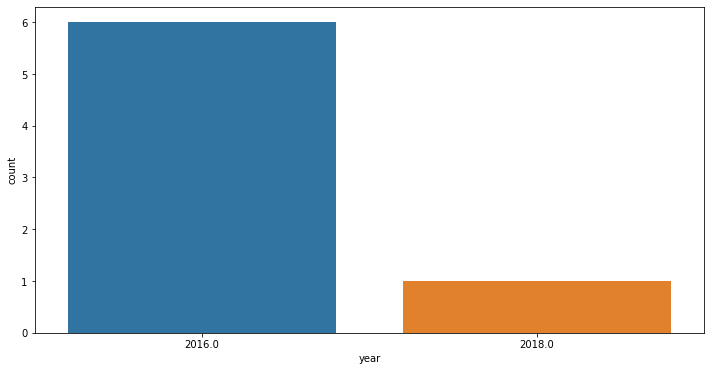

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(data=canceled_df,x='year');

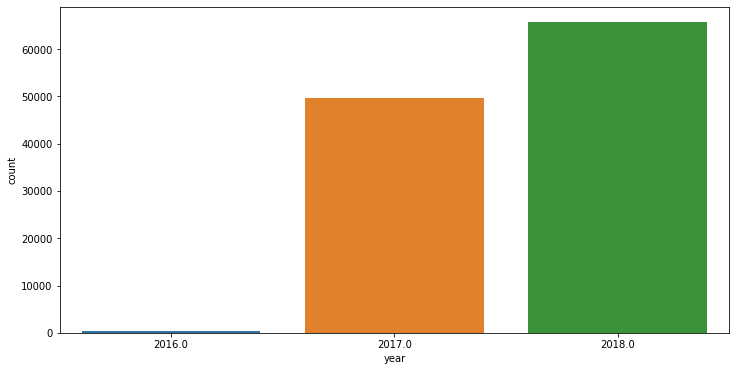

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(data= delivered_df,x='year');

Hình thức thanh toán 

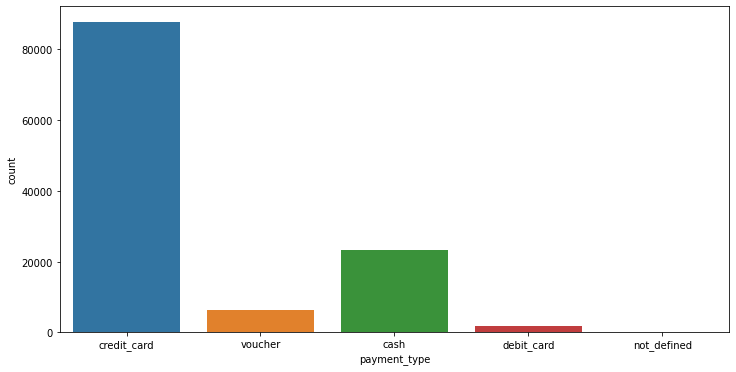

In [21]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='payment_type');

Số sao mà khách hàng đánh giá

In [23]:
star= df.groupby('review_score')['customer_id'].count().reset_index(name='count')
ax= star['review_score']
bx= star['count']

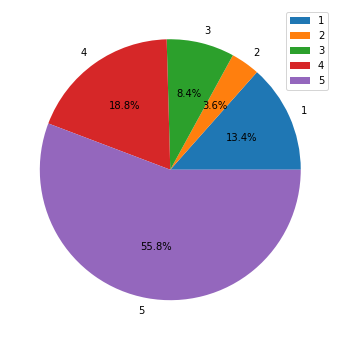

In [26]:
plt.figure(figsize=(15,6))
plt.pie(bx, labels=ax ,autopct='%1.1f%%');
plt.legend();

In [ ]:
#danh sách những sản phẩm đánh giá 1 và 2 sao
star12= df.loc[(df['review_score']== 1)|(df['review_score']==2)]
pd.crosstab(star12.product_category_name, star12.review_score)

In [13]:
# danh sách id người bán có lượt đánh giá 1 và 2 điểm nhiều nhất.
star12.groupby('seller_id')['review_score'].count().sort_values(ascending=False).nlargest(10).reset_index()

,seller_id,review_score
0,4a3ca9315b744ce9f8e9374361493884,443
1,7c67e1448b00f6e969d365cea6b010ab,417
2,6560211a19b47992c3666cc44a7e94c0,390
3,1f50f920176fa81dab994f9023523100,368
4,1025f0e2d44d7041d6cf58b6550e0bfa,307
5,cc419e0650a3c5ba77189a1882b7556a,296
6,da8622b14eb17ae2831f4ac5b9dab84a,253
7,955fee9216a65b617aa5c0531780ce60,225
8,ea8482cd71df3c1969d7b9473ff13abc,209
9,cca3071e3e9bb7d12640c9fbe2301306,206


Top những khách hàng đem lại doanh thu cao nhất cho công ty

In [7]:
df.groupby('customer_id')['payment_value'].sum().sort_values(ascending= False).head(10).to_frame()

,payment_value
customer_id,
1617b1357756262bfa56ab541c47bc16,109312.64
bd5d39761aa56689a265d95d8d32b8be,45256.00
be1b70680b9f9694d8c70f41fa3dc92b,44048.00
05455dfa7cd02f13d132aa7a6a9729c6,36489.24
1ff773612ab8934db89fd5afa8afe506,30186.00
ec5b2ba62e574342386871631fafd3fc,29099.52
e7d6802668de6e74d0d6c56565bf2a24,22346.60
8c20d9bfbc96c5d39025d77a3ba83d7f,21874.05
f7622098214b4634b7fe7eee269b5426,19457.04


Top những thàng phố đem lại doanh thu cao nhất cho công ty

In [18]:
df.groupby('customer_city')['payment_value'].sum().sort_values(ascending=False).to_frame().head(10)

,payment_value
customer_city,
sao paulo,2902209.75
rio de janeiro,1581736.07
belo horizonte,509165.81
brasilia,435971.02
curitiba,333582.09
porto alegre,317995.72
salvador,291499.12
campinas,272689.17
goiania,215121.83
